In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
import quandl as ql
import hvplot.pandas
import plotly.express as px
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\Joseph\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [18]:
#Getting CFTC data from Quandl
ql.ApiConfig.api_key = 'tJdgrzhuFvMvkw--DdYw'
COP_data = ql.get('CFTC/085692_FO_L_ALL')
COP_data.tail()

,Open Interest,Noncommercial Long,Noncommercial Short,Noncommercial Spreads,Commercial Long,Commercial Short,Total Long,Total Short,Nonreportable Positions Long,Nonreportable Positions Short
Date,,,,,,,,,,
2020-06-16,186217.0,55437.0,47500.0,37586.0,78164.0,88590.0,171186.0,173676.0,15030.0,12541.0
2020-06-23,197829.0,60670.0,47020.0,41274.0,81288.0,96510.0,183233.0,184804.0,14595.0,13024.0
2020-06-30,196704.0,67930.0,47804.0,36742.0,77147.0,98303.0,181818.0,182849.0,14886.0,13855.0
2020-07-07,210871.0,77231.0,53648.0,41432.0,75617.0,102053.0,194280.0,197133.0,16591.0,13738.0
2020-07-14,227043.0,88974.0,55829.0,45858.0,75372.0,112347.0,210204.0,214035.0,16839.0,13008.0


In [19]:
#Clean Data
COP_data = COP_data.drop(columns=["Open Interest", 
                                  "Noncommercial Spreads", 
                                  "Commercial Long", 
                                  "Commercial Short", 
                                  "Total Long",
                                  "Total Short",
                                  "Nonreportable Positions Long", 
                                  "Nonreportable Positions Short"])
COP_data.head()

,Noncommercial Long,Noncommercial Short
Date,,
1995-03-21,8807.0,4068.0
1995-03-28,14334.0,7547.0
1995-04-04,15797.0,6908.0
1995-04-18,9521.0,3298.0
1995-04-25,7135.0,10742.0


In [20]:
#Calculate Net Data
COP_data["Net Noncommercial Futures/Options"] = COP_data["Noncommercial Long"] - COP_data["Noncommercial Short"]
COP_data.tail()

,Noncommercial Long,Noncommercial Short,Net Noncommercial Futures/Options
Date,,,
2020-06-16,55437.0,47500.0,7937.0
2020-06-23,60670.0,47020.0,13650.0
2020-06-30,67930.0,47804.0,20126.0
2020-07-07,77231.0,53648.0,23583.0
2020-07-14,88974.0,55829.0,33145.0


In [21]:
#Calculate mean and std
Average = COP_data["Net Noncommercial Futures/Options"].mean()
x = np.array(COP_data["Net Noncommercial Futures/Options"])
std = x.std()

z_score_historical = ((COP_data["Net Noncommercial Futures/Options"][-1]) - Average)/std
z_score_historical

1.6073379986436807

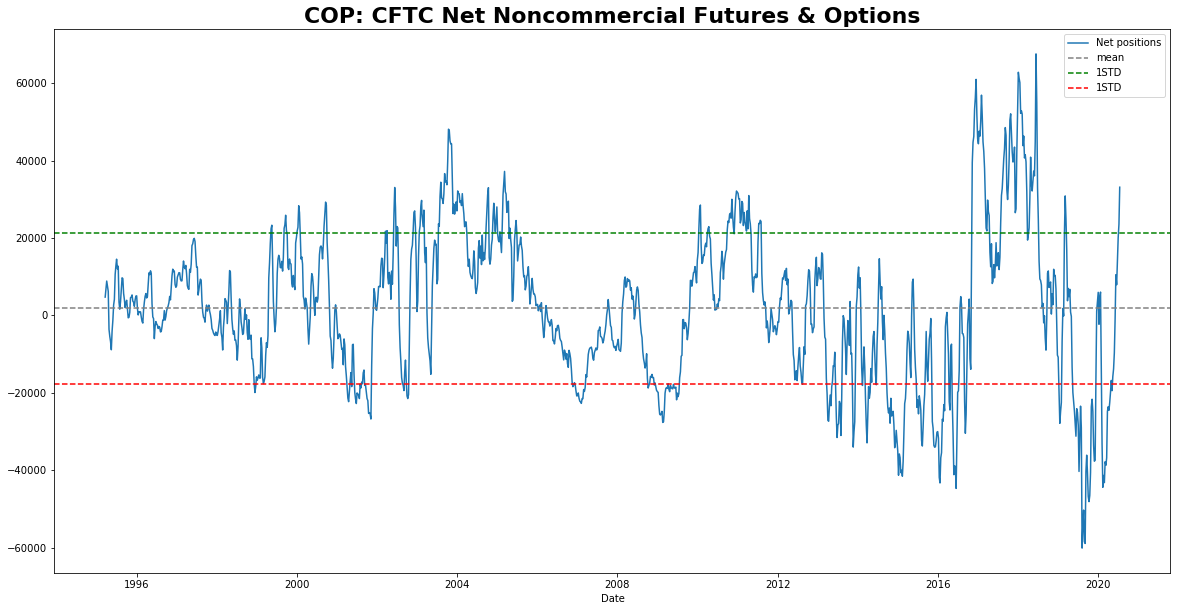

In [23]:
#Plot COP CFTC data
def create_plot(data):
    x = COP_data.index
    y = COP_data["Net Noncommercial Futures/Options"]
    std_positive = (Average + std)
    std_negative = (Average - std)

    plt.subplots(figsize=(20,10))
    plt.plot(x,y, label="Net positions")
    plt.axhline(y=Average,color="grey",linestyle="--", label="mean")
    plt.axhline(y=std_positive, color="green", linestyle="--",label="1STD")
    plt.axhline(y=std_negative, color="red", linestyle="--", label="1STD")
    plt.legend()
    plt.xlabel("Date")
    plt.title(f"COP: CFTC Net Noncommercial Futures & Options", fontdict={'fontweight':'bold', 'fontsize':'22'})
    plt.show()
create_plot(COP_data["Net Noncommercial Futures/Options"])

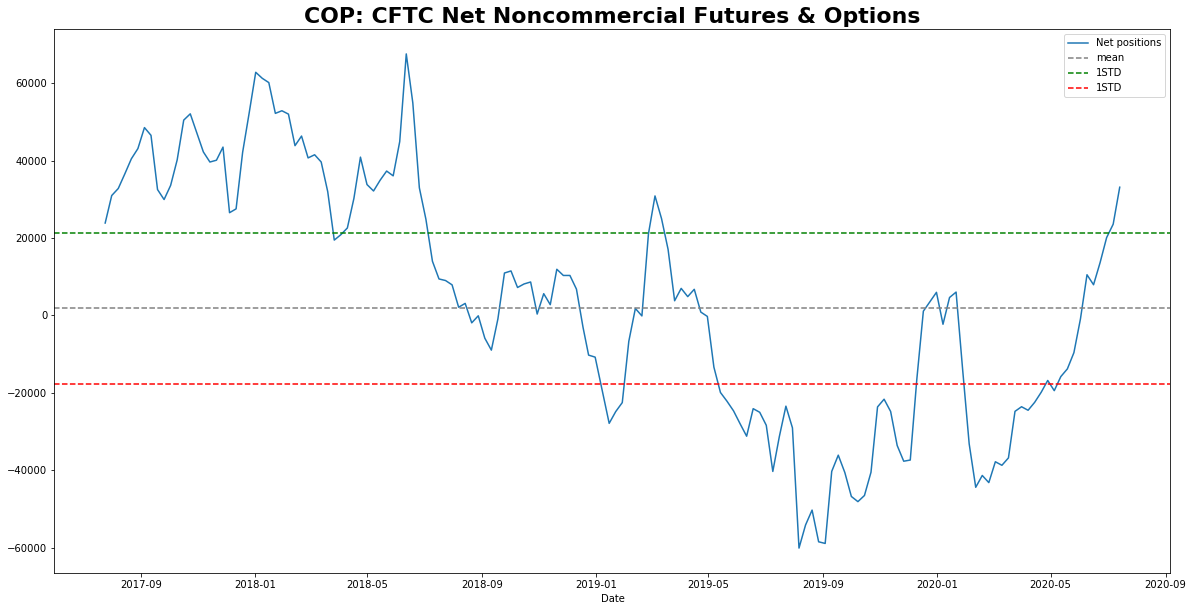

In [24]:
##Plot EUR CFTC data last 3 years
def create_plot(data):
    x = COP_data.index[-156:]
    y = COP_data["Net Noncommercial Futures/Options"][-156:]
    std_positive = (Average + std)
    std_negative = (Average - std)

    plt.subplots(figsize=(20,10))
    plt.plot(x,y, label="Net positions")
    plt.axhline(y=Average,color="grey",linestyle="--", label="mean")
    plt.axhline(y=std_positive, color="green", linestyle="--",label="1STD")
    plt.axhline(y=std_negative, color="red", linestyle="--", label="1STD")
    plt.legend()
    plt.xlabel("Date")
    plt.title(f"COP: CFTC Net Noncommercial Futures & Options", fontdict={'fontweight':'bold', 'fontsize':'22'})
    plt.show()
create_plot(COP_data["Net Noncommercial Futures/Options"][-156:])


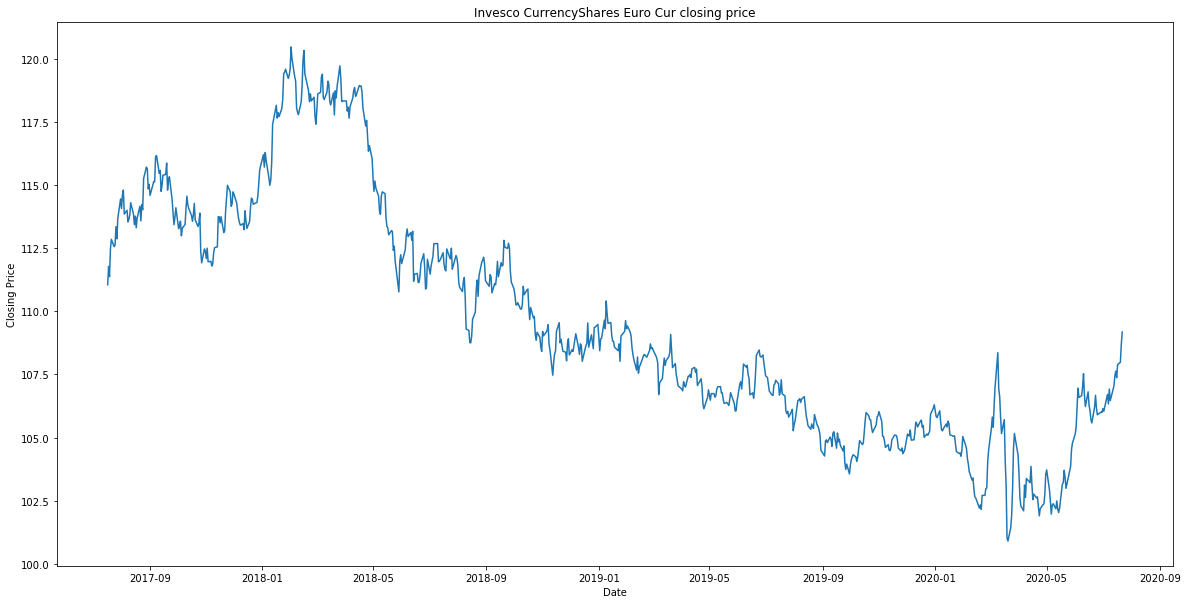

In [25]:
# Plotting Price action
def create_plot(tickersymbol):
    ticker_data = yf.Ticker(tickersymbol)
    today = datetime.datetime.today().isoformat()
    
    ticker_df = ticker_data.history(period='1d', start='2017-07-15', end=today[:10])
    plt.subplots(figsize=(20,10))
    plt.plot(ticker_df["Close"], label=ticker_data.info['shortName'])
    plt.xlabel("Date")
    plt.ylabel("Closing Price")
    plt.title(f"{ticker_data.info['shortName']} closing price")
    
create_plot('FXE')

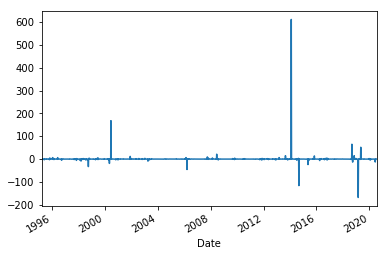

In [26]:
# Calculating changes in CFTC data
COP_data_changes = COP_data.pct_change()
COP_data_changes = COP_data_changes.dropna()
COP_data_changes["Net Noncommercial Futures/Options"].plot()

In [27]:
def zscore(x, window):
    r = x.rolling(window=window)
    m = r.mean().shift(1)
    s = r.std(ddof=0).shift(1)
    z = (x-m)/s
    return z


In [28]:
data = ql.get('CFTC/088691_FO_L_ALL')
data_cleaned = data[['Noncommercial Long', 'Noncommercial Short']]
data_cleaned['Net Noncomercial'] = data_cleaned['Noncommercial Long'] - data_cleaned['Noncommercial Short']
data_cleaned['Zscore'] = zscore(data_cleaned.loc[:,'Net Noncomercial'], 52*3)
data_cleaned.tail()

C:\Users\Joseph\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Joseph\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Noncommercial Long,Noncommercial Short,Net Noncomercial,Zscore
Date,,,,
2020-06-16,299684.0,57187.0,242497.0,0.552596
2020-06-23,335264.0,59738.0,275526.0,0.837809
2020-06-30,355678.0,65306.0,290372.0,0.958842
2020-07-07,366449.0,73204.0,293245.0,0.972015
2020-07-14,358149.0,69220.0,288929.0,0.921702
